In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [3]:
X,y = mnist['data'],mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


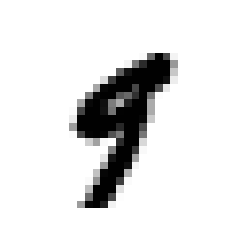

In [4]:
import matplotlib
some_digit=X[36000]
some_digit_image = some_digit.reshape(28,28)
some_digit_image
plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')
plt.show()

In [5]:
y[36000]

'9'

In [6]:
X_train,y_train,X_test,y_test = X[:60000],y[:60000],X[60000:],y[60000:]

In [7]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]

In [ ]:
y_train = y_train.astype(int)

## 이진분류기 훈련

In [8]:
y_train_9 = (y_train == 9)
y_test_9 = (y_test == 9)


In [9]:
sum(y_train_9)

5949

In [10]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter = 5,random_state=42)
sgd_clf.fit(X_train,y_train_9)

SGDClassifier(max_iter=5, random_state=42)

In [11]:
sgd_clf.predict([some_digit])

array([False])

In [12]:
# 교차 검증
from sklearn.model_selection import StratifiedKFold,cross_val_score
cross_val_score(sgd_clf,X_train,y_train_9,cv=3,scoring='accuracy')

array([0.94375, 0.9186 , 0.9526 ])

In [13]:
from sklearn.base import BaseEstimator
class Never9Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [14]:
never_9_clf = Never9Classifier()
cross_val_score(never_9_clf,X_train,y_train_9,cv=3,scoring='accuracy')

array([0.89985, 0.90245, 0.90025])

## 오차 행렬

In [15]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_9,cv=3)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_9,y_train_pred) # true_y,pred_y

array([[52608,  1443],
       [ 2258,  3691]], dtype=int64)

## 정밀도와 재현율

In [17]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_9,y_train_pred) # 정밀도

0.7189326061550448

In [18]:
recall_score(y_train_9,y_train_pred) # 재현율

0.6204404101529669

In [19]:
from sklearn.metrics import f1_score
f1_score(y_train_9,y_train_pred) # f1 score

0.6660651448163855

In [20]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-89945.7332109])

In [21]:
threshold = 0
y_some_digit_pred = (y_scores>threshold)

In [22]:
y_some_digit_pred

array([False])

In [23]:
threshold = -250000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([ True])

In [24]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_9,cv=3,method = 'decision_function') # 결정 점수 반환
y_scores

array([-1017687.34316965, -1122998.11586006,  -696331.11751679, ...,
        -182453.17747056,  -307281.6094528 ,  -955618.71560754])

In [25]:
len(y_scores)

60000

In [26]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_9,y_scores)

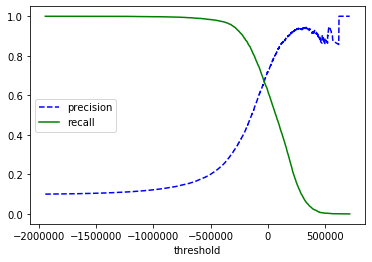

In [27]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label='precision')
    plt.plot(thresholds,recalls[:-1],'g-',label='recall')
    plt.xlabel('threshold')
    plt.legend(loc='center left')
#     plt.ylim([0,1])
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [28]:
y_train_pred_90 = (y_scores>90)
precision_score(y_train_9,y_train_pred_90)

0.7190179267342167

In [29]:
recall_score(y_train_9,y_train_pred_90)

0.6202723146747352

## roc curve

In [30]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train_9,y_scores)

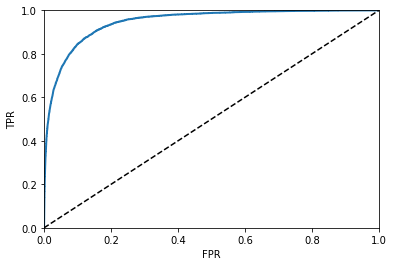

In [31]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
plot_roc_curve(fpr,tpr)
plt.show()

In [32]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_9,y_scores)

0.9471669856860779

In [33]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_9,cv=3,method='predict_proba')
y_probas_forest

array([[0.96, 0.04],
       [0.99, 0.01],
       [0.97, 0.03],
       ...,
       [0.35, 0.65],
       [1.  , 0.  ],
       [0.99, 0.01]])

In [34]:
y_scores_forest = y_probas_forest[:,1] # 양성 클래스에 대한 확률
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_9,y_scores_forest)

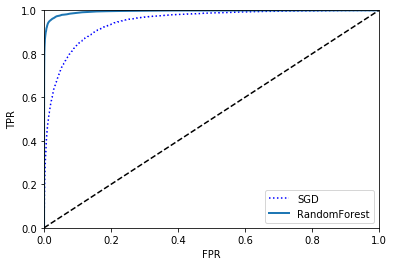

In [35]:
plt.plot(fpr,tpr,'b:',label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,'RandomForest')
plt.legend(loc='lower right')
plt.show()

In [36]:
roc_auc_score(y_train_9,y_scores_forest)

0.9953247587939047

## 다중 분류기

In [37]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array(['9'], dtype='<U1')

In [38]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-919507.94570467, -498395.13815053, -599179.60791843,
        -212406.59356348, -138050.95953883, -257836.06120385,
        -770707.34158311, -361396.23740717, -321527.56462569,
        -135213.5602441 ]])

In [39]:
np.argmax(some_digit_scores)
sgd_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [46]:
sgd_clf.classes_[9]

'9'

In [41]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5,random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

array(['4'], dtype=object)

In [42]:
len(ovo_clf.estimators_)

45

In [43]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

array(['9'], dtype=object)

In [44]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.  , 0.  , 0.08, 0.01, 0.  , 0.  , 0.01, 0.9 ]])

In [45]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.86875, 0.87865, 0.8543 ])

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64)) # input data Scaling
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring='accuracy')

array([0.90765, 0.91065, 0.91155])

## 에러분석

In [52]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv = 3)

In [53]:
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

array([[5725,    2,   30,   10,   11,   51,   46,    9,   36,    3],
       [   1, 6443,   53,   27,    6,   41,   10,   16,  135,   10],
       [  56,   37, 5317,  110,   80,   21,  104,   59,  160,   14],
       [  46,   38,  136, 5372,    2,  220,   32,   55,  135,   95],
       [  24,   28,   31,    6, 5370,    9,   58,   24,   87,  205],
       [  68,   41,   31,  200,   77, 4608,  110,   30,  165,   91],
       [  30,   25,   42,    1,   37,   95, 5636,    8,   44,    0],
       [  23,   23,   67,   32,   58,   10,    6, 5800,   18,  228],
       [  52,  145,   75,  161,   12,  157,   53,   28, 5039,  129],
       [  45,   29,   27,   90,  152,   37,    2,  200,   80, 5287]],
      dtype=int64)

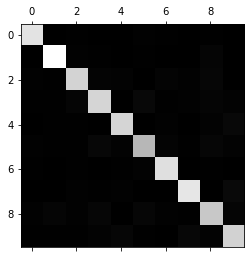

In [54]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [55]:
row_sums = conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx/row_sums

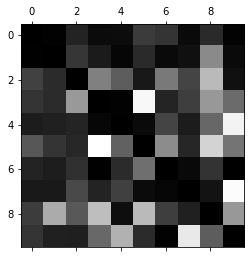

In [56]:
np.fill_diagonal(norm_conf_mx,0) # 주 대각선 0으로 채우기
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

In [57]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

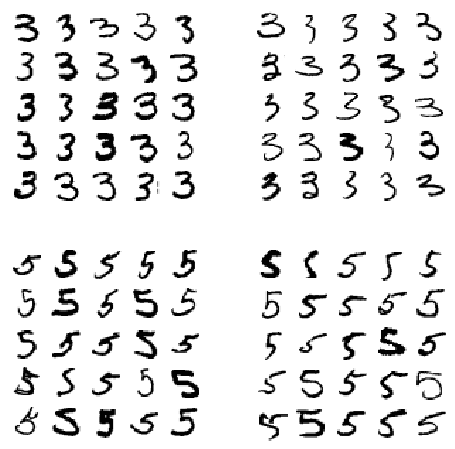

In [68]:
cl_a, cl_b ='3','5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

## 다중 레이블 분류

In [71]:
y_train = y_train.astype(int)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train>=7)
y_train_odd = (y_train%2 == 1)
y_multiplabel = np.c_[y_train_large,y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multiplabel)

KNeighborsClassifier()

In [73]:
knn_clf.predict([some_digit]) # 숫자 9에 대한 분류

array([[ True,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_multiplabel,cv=3,n_jobs=-1)

In [75]:
f1_score(y_multiplabel,y_train_knn_pred,average='macro')

0.9773655485049088

## 다중 출력 분류

In [76]:
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [79]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

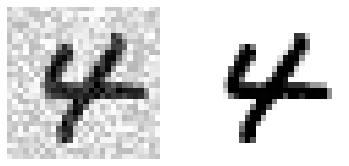

In [80]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()


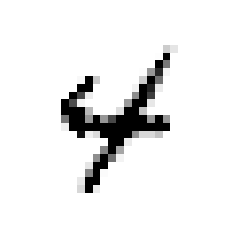

In [81]:
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)